In [2]:
import pandas as pd
from plotnine import *


df = pd.read_csv("filmi.csv")
res = df.groupby(["naslov","leto"], as_index=False)["stevilo"].sum()
res.rename(columns={"stevilo": "stevilo_nominacij"}, inplace=True)

odgovor1a = res.loc[res['stevilo_nominacij'] == res["stevilo_nominacij"].max()]
print(odgovor1a)


             naslov  leto  stevilo_nominacij
63    All About Eve  1950                 14
539      La La Land  2016                 14
1244        Titanic  1997                 14


S funkcijo sum() smo dobili število nominacij, ker obstajajao filmi z istim naslovom, ampak imajo starejše/novejše verzije kot npr. A Star Is Born, jih obravnavamo kot drugačni filmi in jih grupiramo po naslovu in letu. Nato najdemo maksimalno vrednost število nominacij in vrnemo vse vrstice, ki imajo to vrednost.

In [2]:
filtriran = df[df["oskar"]].reset_index(drop= True)

filtriran["stevilo_nominacij"] = res.loc[:,"stevilo_nominacij"]
filtriran = filtriran[(filtriran["stevilo_nominacij"] >= 3) & (filtriran["stevilo"] >= filtriran["stevilo_nominacij"] / 2)].reset_index(drop=True)
odgovor1b = filtriran.shape[0]
print(odgovor1b)

148


Tabelo smo filtrirali, tako da smo odstranili vse filme, ki so imeli lastnost False, ker nas zanima samo število pridboljenih oksarjev. Nato smo šte dodali stoplec s skupnim število nominacij, nato smo v tabeli shranili samo podatke, ki zadoščaju pogoju in vrnili število filmov, ki zadošča tem pogoju.

In [3]:
filtriran = df[df["oskar"]].reset_index(drop= True)
filtriran["desetletje"] = (filtriran["leto"] // 10) * 10
filtriran["stoletje"] = (filtriran["leto"] // 100) + 1
res = filtriran.groupby(["desetletje","stoletje"], as_index=False)["stevilo"].sum()

vrstica = res.loc[res['stevilo'] == res["stevilo"].max()]

print(f"Največ filmov je bilo nagrajenih v {(vrstica['desetletje'].values[0]%100)//10 + 1}.desetletju {vrstica['stoletje'].values[0]}. stoletja s {vrstica['stevilo'].values[0]} nagrajenih filmov")

Največ filmov je bilo nagrajenih v 6.desetletju 20. stoletja s 251 nagrajenih filmov


Za vsako leto smo izračunali, v katero desetlejte in stoletje spada ter dodali nove stoplce. Tabelo smo nato grupirali po desetletju in stoletju ter sešteli vse nagrajene filme v tistem desetletju. Nato smo pogledali, katero desetletje ima največ nagrajenih filmov.

In [45]:
prestej = filtriran['naslov'].value_counts()
dvakrat = prestej[prestej == 2].index.tolist()

pt = filtriran[filtriran['naslov'].isin(dvakrat)]

odgovor1d = pt.groupby('naslov').filter(lambda group: group['stevilo'].nunique() == True)['naslov'].unique() # S pomočjo ChatGPT-ja: grupiramo po naslovu, preveri če so števila enaka, nato unique vrne naslove teh filmov
print(odgovor1d)


['Cyrano de Bergerac' 'The Fly' 'The Great Gatsby'
 'The Old Man and the Sea']


Najprej za vsak film preštejemo kokrat se naslov ponovi, nato najdemo filme, kateri se naslovi ponovijo natančno dvakrat. Filme z istim naslovom nato preverimo, če imajo isto število oskarjev, take filme nato vrnemo kot rešitev.

In [217]:
tuji_filmi = pd.read_csv("tuji_filmi.csv")
filmi = pd.read_csv("filmi.csv")

tuji_filmi = tuji_filmi[tuji_filmi["drzava"] != "United States"] #odstranimo ameriko

tuje_nominacije = (tuji_filmi.groupby(["drzava", "leto"]).size().reset_index(name="st_nominacij")) #za vsako drzavo za vsako leto izračunamo število nominacij

filmi_merged = pd.merge(filmi, tuji_filmi, left_on=["naslov", "leto"], right_on=["naslov_nom", "leto"], how="inner")

st_oskarjev = (filmi_merged[filmi_merged["oskar"]].groupby(["drzava", "leto"]).size().reset_index(name="st_oskarjev")) #za vsako drzavo za vsako leto število oskarjev

tabela2a = pd.merge(tuje_nominacije, st_oskarjev, on=["drzava", "leto"],how="left").fillna(0)

tabela2a["st_nominacij"] = tabela2a["st_nominacij"].astype(int)
tabela2a["st_oskarjev"] = tabela2a["st_oskarjev"].astype(int)

tabela2a.to_csv("tabela2a.csv", index=False)

Iz tujih filmov smo naprej odstranili vse filme, ki imajo v stolpcu država, državo United States. Nato smo grupirali po državi in letu, kjer smo izračunali število nominacij vsake države v določenem letu.  

In [53]:
odgovor2b = tuje_nominacije["st_nominacij"].max()
#odgovor2b = tuje_nominacije.loc[tuje_nominacije["st_nominacij"] == tuje_nominacije["st_nominacij"].max()]
print(odgovor2b)
odgovor2c = st_oskarjev["st_oskarjev"].max()
#odgovor2c = st_oskarjev.loc[st_oskarjev["st_oskarjev"] == st_oskarjev["st_oskarjev"].max()]
print(odgovor2c)

12
6


In [69]:
maks_oskar = st_oskarjev[st_oskarjev["st_oskarjev"] == odgovor2c]

filtriran =  tuji_filmi[(tuji_filmi['drzava'].isin(maks_oskar['drzava']) & (tuji_filmi['leto'].isin(maks_oskar['leto'])))]

odgovor2d = filtriran['naslov_nom'].unique()
print(odgovor2d)


['All Quiet on the Western Front' 'Life Is Beautiful']


Najprej najdemo države in leta, ki imajo maksimalno število oskarjev. Nato v tabeli tuji_filmi najdemo vse filme, ki vsebujejo to državo in leto. Vrnemo samo naslove teh filmov.

In [146]:
st_nominacij = tuje_nominacije['drzava'].value_counts().reset_index()
st_oskar = st_oskarjev['drzava'].value_counts().reset_index()

tabela2e = pd.merge(st_nominacij, st_oskar, left_on=["drzava"], right_on=["drzava"], how="outer").fillna(0)
tabela2e["count_x"] = tabela2e["count_x"].astype(int) #število nominacij
tabela2e["count_y"] = tabela2e["count_y"].astype(int) #število oskarjev
tabela2e["delez"] = (tabela2e["count_y"]/tabela2e["count_x"]).astype(float)
tabela2e.drop(columns = ["count_x", "count_y"], inplace = True)

tabela2e.to_csv("tabela2e.csv", index=False)
odgovor2e = tabela2e.loc[tabela2e["delez"].idxmin()]
odgovor2e = odgovor2e['drzava']
print(odgovor2e)

Czech Republic


Sešteli nominacije in oskarje za vsako državo. Obe tabeli smo zdužili, kjer smo nato izračunali delež s število oskarjev/število nominacij. Odstranili nepotrebne stoplce in vrnili državo z najmanjšim deležem.

In [215]:
populacija = pd.read_csv("populacija.csv")
populacija = populacija.loc[populacija['leto'] == 2015]
populacija1 = populacija.loc[populacija['spremenljivka'].isin(['Capital city population (as a percentage of total population)'])]  
populacija2 = populacija.loc[populacija['spremenljivka'].isin(['Capital city population (thousands)'])] 

populacija = pd.merge(populacija1, populacija2, left_on = ['enota', 'leto'], right_on=['enota', 'leto'], how="outer")
populacija.drop(columns = ['spremenljivka_x', 'spremenljivka_y'],inplace = True)

populacija['vrednost_y']= populacija['vrednost_y']*1000
populacija['vrednost_x'] = populacija['vrednost_x']*0.01
populacija['populacija'] = populacija['vrednost_y']/populacija['vrednost_x']

populacija.drop(columns= ['vrednost_x', 'vrednost_y'], inplace = True)

tabela2f = pd.merge(populacija, tabela2e, left_on=['enota'], right_on=['drzava'], how='inner')
tabela2f['nominacije_na_mio'] = tabela2f['populacija']/tabela2f['delez']
tabela2f.drop(columns = ['leto', 'populacija', 'drzava','delez'], inplace = True)

tabela2f.to_csv("tabela2f.csv", index = False)


             enota  nominacije_na_mio
0          Algeria       3.987692e+07
1        Argentina       4.338053e+07
2           Brazil       2.084000e+08
3            Chile       1.777384e+07
4            China       1.417000e+09
5           France       7.498802e+07
6          Germany       8.172093e+07
7           Greece       1.120922e+07
8            India       1.293300e+09
9            Italy       9.934783e+07
10           Japan       1.280275e+08
11          Mexico       1.255294e+08
12            Peru       3.135144e+07
13           Spain       4.642537e+07
14          Sweden       1.954248e+07
15     Switzerland       8.346939e+06
16         Ukraine       4.453846e+07
17  United Kingdom       9.842045e+07


Vzeli smo podatke, ki nam povejo število prebivalstva v glavnem mestu in njegov procent. Iz tega smo lahko izračunali celotno populacijo države. Na koncu smo tabele z nominacijami in tabelo z populacijo združili, kjer smo izračunali delež nominacij v miliojonu.

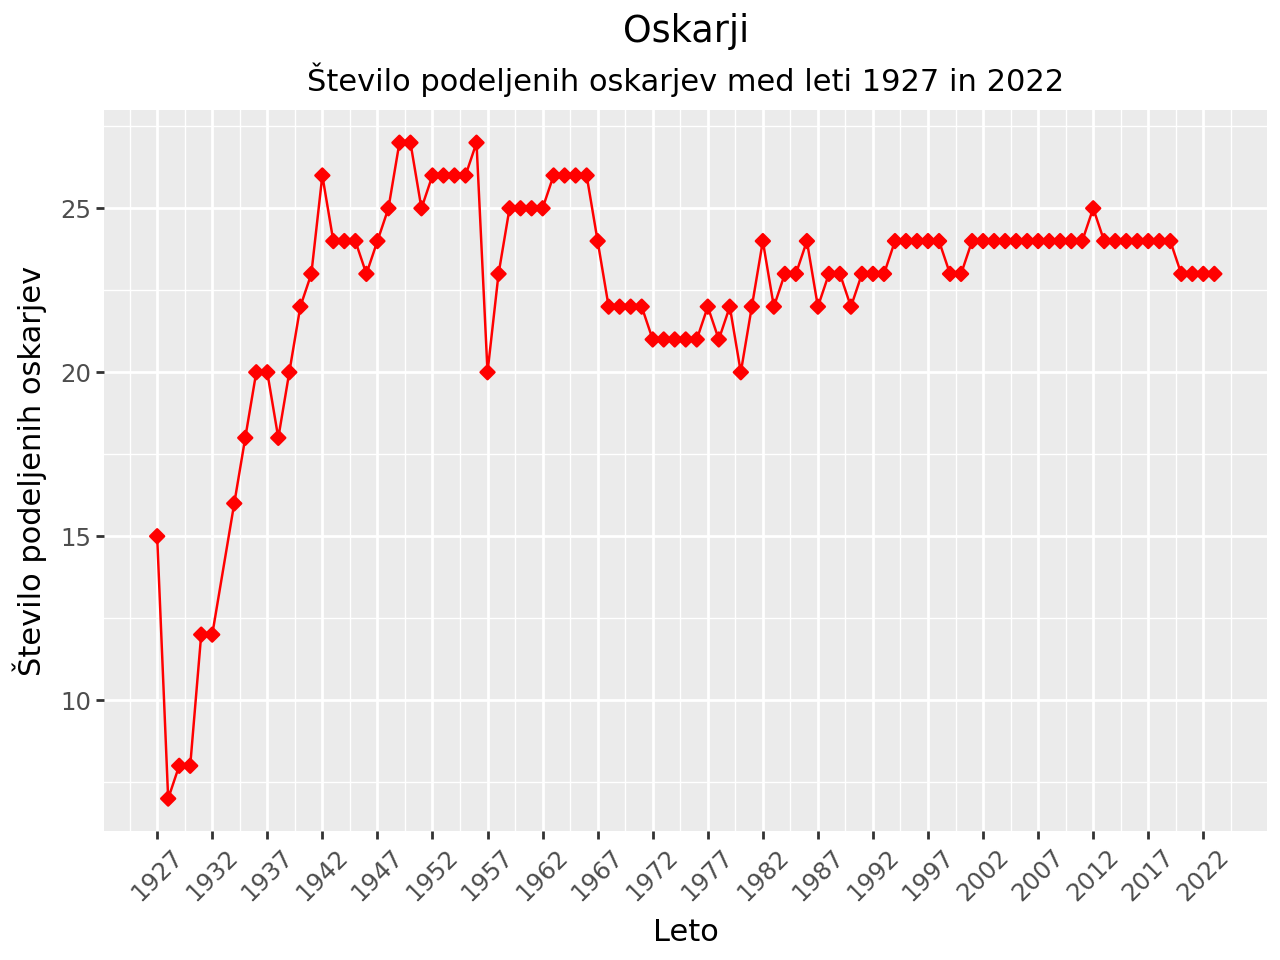

In [5]:
filmi = pd.read_csv("filmi.csv")
filmi = filmi[filmi['oskar'] != False]
filmi = filmi.groupby('leto', as_index=False)['stevilo'].sum()
        

plot = (
    ggplot(data = filmi) +
    aes(
        x = "leto",
        y = "stevilo",
        
    ) +
    geom_line(color = "red") +
    geom_point(color = "red", shape = "D")+
    labs(x= "Leto",
        y = "Število podeljenih oskarjev",
        title="Oskarji", 
        subtitle="Število podeljenih oskarjev med leti 1927 in 2022",
        )+
    scale_x_continuous(
      breaks=list(range(1927,2024,5))
      )+
    theme(
      plot_title = element_text(ha = "center"),
      plot_subtitle = element_text(ha = "center"),
      axis_text_x = element_text(angle=45)
    )
)



plot.show()
#plot.save(filename= "graf3a")

c:\Users\blabl\OneDrive\Desktop\PAPVP\venv\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



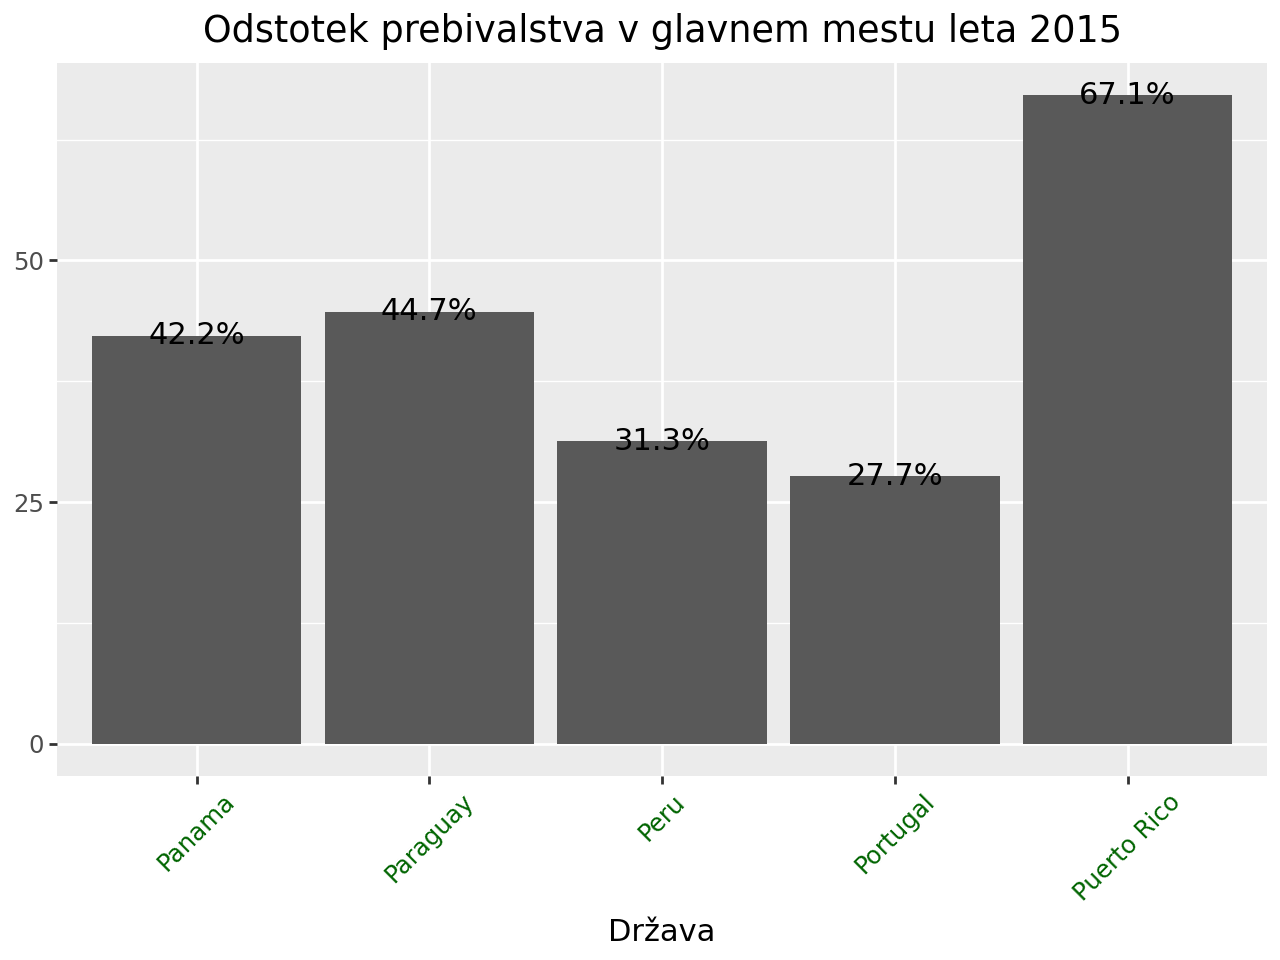

In [23]:
populacija = pd.read_csv("populacija.csv")
populacija = populacija[populacija['leto'] == 2015]
populacija = populacija[populacija['enota'].isin(["Puerto Rico", "Paraguay", "Panama", "Peru", "Portugal"])]
populacija = populacija[populacija['spremenljivka'].isin(["Capital city population (as a percentage of total population)"])]
populacija = populacija.sort_values(by = "vrednost", ascending=False).reset_index(drop = True)
izven = [round(100- val, 2) for val in populacija['vrednost']]
glavno_mesto = populacija["vrednost"].to_list()

plot = (
    ggplot(populacija, aes(x='enota', y='vrednost')) +
    geom_bar(stat = 'identity') +
    labs(
        title='Odstotek prebivalstva v glavnem mestu leta 2015',
        x='Država',
        y = ''
    )+
    scale_y_continuous(
      
    )+
    geom_text(aes(label = populacija["vrednost"].astype(str)+"%"))+
    theme(
      axis_text_x= element_text(color="darkgreen",angle = 45))+
    scale_y_continuous(breaks=list(range(0,100,25)))
)


plot.show()
